In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import ssl
%matplotlib inline

In [56]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [57]:
edp = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/EDP.LS?period1=946857600&period2=1669939200&interval=1d&events=history&includeAdjustedClose=true")

In [58]:
edp.set_index("Date").index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2022-11-18', '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
       '2022-11-25', '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01'],
      dtype='object', name='Date', length=5902)

In [59]:
edp["Date"] = edp["Date"].transform(pd.to_datetime)
edp.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [60]:
edp.set_index("Date", inplace=True)

<AxesSubplot: xlabel='Date'>

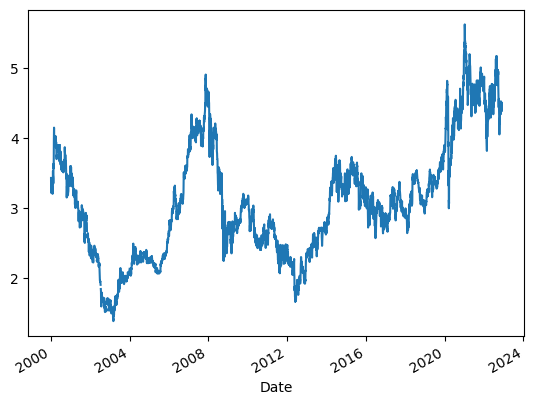

In [61]:
edp["Close"].plot()

In [62]:
edp.asfreq("D", method="ffill")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,3.500,3.520,3.344,3.430,1.056919,3561165.0
2000-01-04,3.370,3.390,3.218,3.280,1.010697,6797105.0
2000-01-05,3.220,3.228,3.100,3.218,0.991593,5773355.0
2000-01-06,3.200,3.230,3.190,3.230,0.995291,3926725.0
2000-01-07,3.298,3.336,3.242,3.284,1.011930,4187045.0
...,...,...,...,...,...,...
2022-11-27,4.504,4.517,4.465,4.477,4.477000,4658872.0
2022-11-28,4.462,4.475,4.369,4.388,4.388000,8829862.0
2022-11-29,4.408,4.455,4.362,4.420,4.420000,9314450.0


Text(0, 0.5, '% Return on Investment')

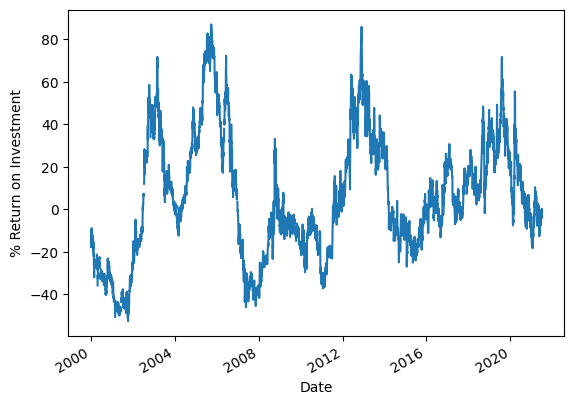

In [63]:
ROI = 100 * (edp["Close"].shift(-365) / edp['Close'] - 1)
ROI.plot()
plt.ylabel("% Return on Investment")

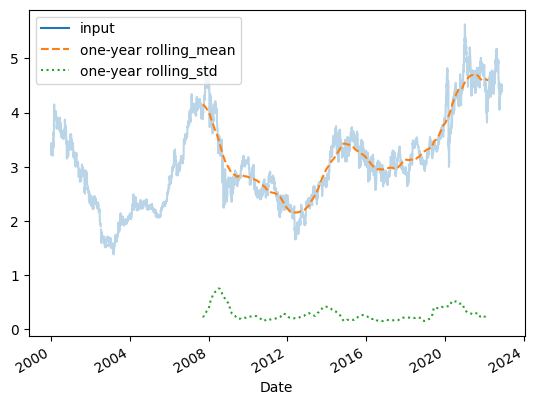

In [64]:
rolling = edp["Close"].rolling(365, center=True)
data = pd.DataFrame({"input": edp["Close"],
"one-year rolling_mean": rolling.mean(),
"one-year rolling_std": rolling.std(),
})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

ModuleNotFoundError: No module named 'statsmodels.tsa.statools'

In [69]:
decomposition = seasonal_decompose(edp["Close"].asfreq("D", method="ffill").dropna(), period=100)

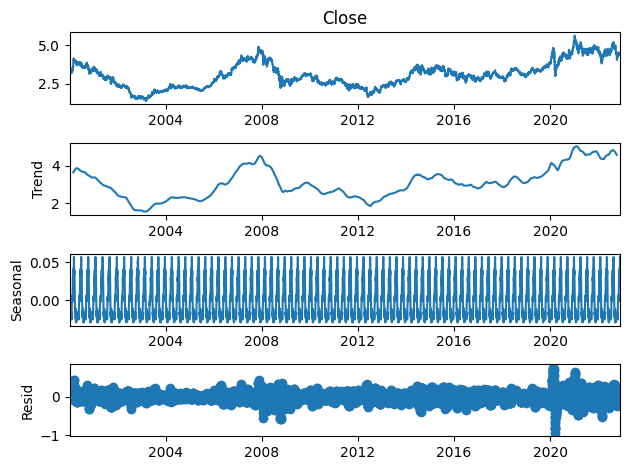

In [70]:
decomposition.plot()
plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    edp = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(edp[:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used",])

    for key, value in edp[4].items():
        dfoutput[f"Critical Value ({key})"] = value
    print(dfoutput)

In [75]:
adf_test(edp["Close"].dropna())

Results of Dickey-Fuller Test:
Test Statistic                   -1.564262
p-value                           0.501516
#Lags Used                       24.000000
Number of Observations Used    5804.000000
Critical Value (1%)              -3.431477
Critical Value (5%)              -2.862038
Critical Value (10%)             -2.567035
dtype: float64
